<a href="https://colab.research.google.com/github/yashraj01-se/Machine_learning_important_concepts/blob/main/Support_Vector_Machine_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset and visualize:

In [1]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
X,y=make_blobs(n_samples=1000,
               shuffle=True,
               random_state=42,
               n_features=2,
               cluster_std=1.5,
               )
data=pd.DataFrame({"X1":X[:,0],
                  "X2":X[:,1],
                  "labels":y[:]})
data.head()

,X1,X2,labels
0,-6.454695,-7.268467,2
1,-5.766484,-6.431171,2
2,5.477369,2.087178,1
3,-3.198239,7.739520,0
4,-2.898585,6.759572,0


In [3]:
def plot_creation(X1,X2):
  plt.figure(figsize=(10,6))
  plt.scatter(X1,X2,c=y,cmap=plt.cm.RdYlBu)
  plt.title("Data Visualization")
  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.legend()
  plt.show()

/tmp/ipython-input-3-2549442714.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


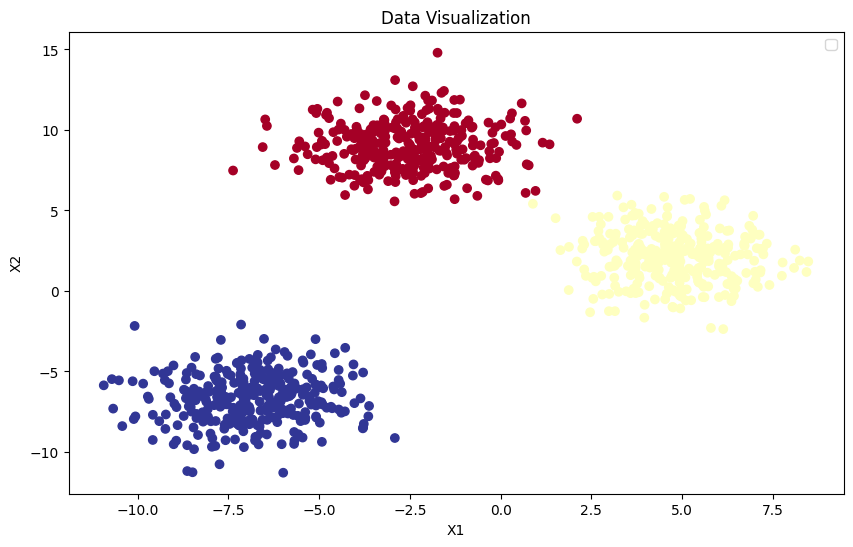

In [4]:
plot_creation(X1=X[:,0],
              X2=X[:,1])

In [5]:
# Convert labels from (0,1) to (-1,1) for hinge loss
y = y * 2 - 1

#Model Creation:

In [26]:
print("Data type before: ",X.dtype,y.dtype)
print("Type before: ",type(X),type(y))
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
print("Data type before: ",X.dtype,y.dtype)
print("Type before: ",type(X),type(y))

Data type before:  float64 int64
Type before:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Data type before:  torch.float32 torch.float32
Type before:  <class 'torch.Tensor'> <class 'torch.Tensor'>


In [27]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
print(len(X_train),len(y_train),len(X_test),len(y_test))

800 800 200 200


In [37]:
class SVM(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

In [38]:
model_2=SVM()
model_2.state_dict()

OrderedDict([('linear.weight', tensor([[ 0.3410, -0.0998]])),
             ('linear.bias', tensor([0.5451]))])

In [39]:
def hinge_loss(output, target):
    return torch.mean(torch.clamp(1 - output.view(-1) * target, min=0))

optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.01)

In [46]:
def accuracy(y_true, y_pred):
    preds = torch.sign(y_pred)
    return (preds == y_true).float().mean()

In [41]:
epoch_count=[]
train_loss_value=[]
test_loss_value=[]
def train_test_loop(epochs,model,X_train,X_test,Y_train,Y_test,loss_fn,optimizer,accuracy,epoch_count,train_loss_value,test_loss_value):
  for epoch in range(epochs):
    model_2.train()
    train_pred=model(X_train)
    train_loss=loss_fn(train_pred,Y_train)
    train_acc=accuracy(Y_train,train_pred)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
      test_pred=model(X_test)
      test_loss=loss_fn(test_pred,Y_test)
      test_acc=accuracy(Y_test,test_pred)

    if epoch%10==0:
      epoch_count.append(epoch)
      test_loss_value.append(test_loss.item())
      train_loss_value.append(train_loss.item())
      print(f"Epoch :{epoch} , Training loss : {train_loss:.2f} , Trianing Accuracy : {train_acc:.2f} , Testing loss : {test_loss:.2f} , Testing Accuracy : {test_acc:.2f}")


In [47]:
train_test_loop(epochs=500,
                model=model_2,
                X_train=X_train,Y_train=y_train,X_test=X_test,Y_test=y_test,
                loss_fn=hinge_loss,optimizer=optimizer,accuracy=accuracy,
                epoch_count=epoch_count,train_loss_value=train_loss_value,test_loss_value=test_loss_value)

Epoch :0 , Training loss : 0.02 , Trianing Accuracy : 0.34 , Testing loss : 0.03 , Testing Accuracy : 0.31
Epoch :10 , Training loss : 0.02 , Trianing Accuracy : 0.34 , Testing loss : 0.03 , Testing Accuracy : 0.31
Epoch :20 , Training loss : 0.02 , Trianing Accuracy : 0.34 , Testing loss : 0.03 , Testing Accuracy : 0.31
Epoch :30 , Training loss : 0.02 , Trianing Accuracy : 0.34 , Testing loss : 0.03 , Testing Accuracy : 0.31
Epoch :40 , Training loss : 0.02 , Trianing Accuracy : 0.34 , Testing loss : 0.03 , Testing Accuracy : 0.31
Epoch :50 , Training loss : 0.02 , Trianing Accuracy : 0.34 , Testing loss : 0.03 , Testing Accuracy : 0.31
Epoch :60 , Training loss : 0.02 , Trianing Accuracy : 0.34 , Testing loss : 0.03 , Testing Accuracy : 0.31
Epoch :70 , Training loss : 0.02 , Trianing Accuracy : 0.34 , Testing loss : 0.03 , Testing Accuracy : 0.31
Epoch :80 , Training loss : 0.02 , Trianing Accuracy : 0.34 , Testing loss : 0.03 , Testing Accuracy : 0.31
Epoch :90 , Training loss : 0

In [48]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skipping download


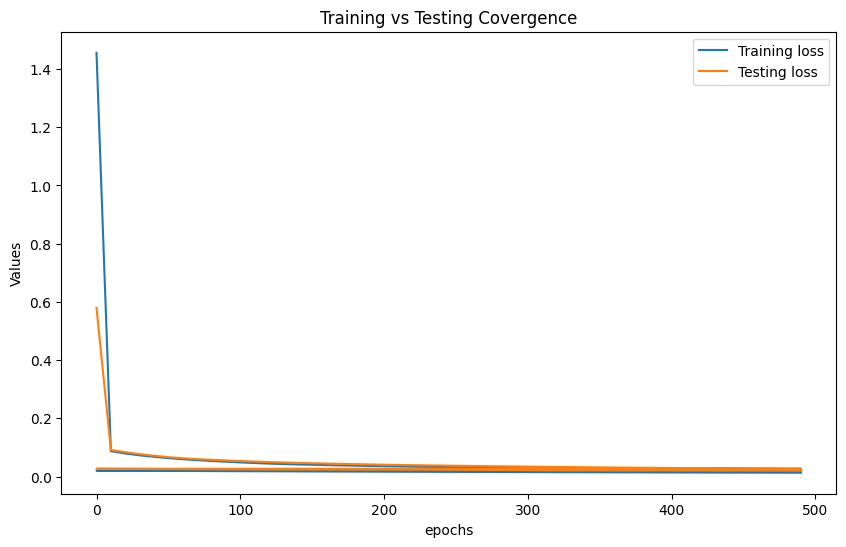

In [49]:

import numpy as np
def plot_loss_convergence(epoch_count,
                          train_value,
                          test_value):
  plt.figure(figsize=(10,6))
  plt.plot(epoch_count,np.array(torch.tensor(train_value).numpy()),label="Training loss")
  plt.plot(epoch_count,np.array(torch.tensor(test_value).numpy()),label="Testing loss")
  plt.xlabel("epochs")
  plt.ylabel("Values")
  plt.title("Training vs Testing Covergence")
  plt.legend()
  plt.show()

plot_loss_convergence(epoch_count,train_loss_value,test_loss_value)

Text(0.5, 1.0, 'Testing')

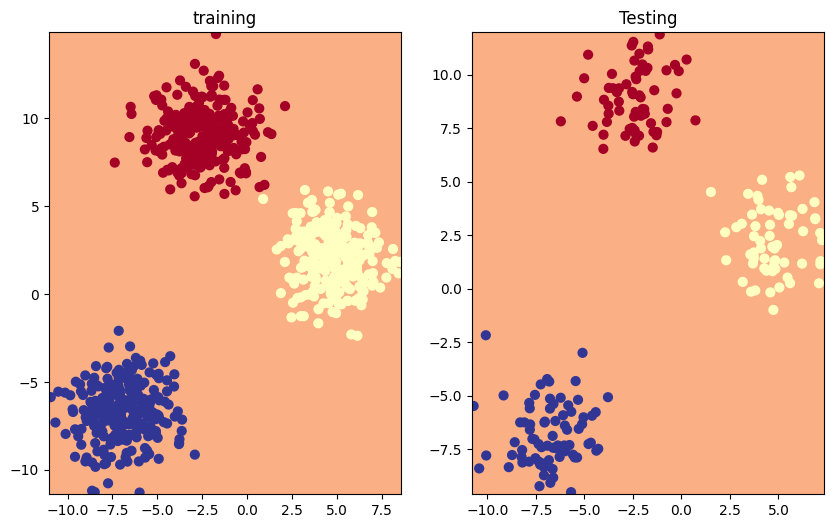

In [50]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_2,X_train,y_train)
plt.title("training")
plt.subplot(1,2,2)
plot_decision_boundary(model_2,X_test,y_test)
plt.title("Testing")